In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
directory1 = '/data/twitter_spritzer/analysis/synthetic_evaluation_dataset/kulkarni_candidates/monthly/independent/vec_200_w9_mc100_iter15/2012_01_to_2017_06/'
directory2 = '/data/twitter_spritzer/analysis/synthetic_evaluation_dataset/kulkarni_candidates/monthly/independent/subsampled_70/vec_200_w9_mc100_iter15/2012_01_to_2017_06/'
directory3 = '/data/twitter_spritzer/analysis/synthetic_evaluation_dataset/kulkarni_candidates/monthly/continuous/vec_200_w9_mc100_iter15/2012_01_to_2017_06/'
directory4 = '/data/twitter_spritzer/analysis/synthetic_evaluation_dataset/kulkarni_candidates/monthly/continuous/subsampled_70/vec_200_w9_mc100_iter15/2012_01_to_2017_06/'

In [3]:
directory5 = '/data/twitter_spritzer/analysis/synthetic_evaluation_dataset/hamilton_candidates/monthly/independent/vec_200_w9_mc100_iter15/2012_01_to_2017_06/'
directory6 = '/data/twitter_spritzer/analysis/synthetic_evaluation_dataset/hamilton_candidates/monthly/independent/subsampled_70/vec_200_w9_mc100_iter15/2012_01_to_2017_06/'
directory7 = '/data/twitter_spritzer/analysis/synthetic_evaluation_dataset/hamilton_candidates/monthly/continuous/vec_200_w9_mc100_iter15/2012_01_to_2017_06/'
directory8 = '/data/twitter_spritzer/analysis/synthetic_evaluation_dataset/hamilton_candidates/monthly/continuous/subsampled_70/vec_200_w9_mc100_iter15/2012_01_to_2017_06/'

In [9]:
z_scores_fp = directory1 +'time_series_analysis_z_scores_f2012_01_l2017_06_alast_clast_mcosine_k25_v75.json'
with open(z_scores_fp, 'r') as infile:
    d = json.load(infile)
d.keys()

dict_keys(['2012_01', '2012_02', '2012_03', '2012_04', '2012_05', '2012_06', '2012_07', '2012_08', '2012_09', '2012_10', '2012_11', '2012_12', '2013_01', '2013_02', '2013_03', '2013_04', '2013_05', '2013_06', '2013_07', '2013_08', '2013_09', '2013_10', '2013_11', '2013_12', '2014_01', '2014_02', '2014_03', '2014_04', '2014_05', '2014_06', '2014_07', '2014_08', '2014_09', '2014_10', '2014_11', '2014_12', '2015_01', '2015_02', '2015_03', '2015_04', '2015_05', '2015_06', '2015_07', '2015_08', '2015_09', '2015_10', '2015_11', '2015_12', '2016_01', '2016_02', '2016_03', '2016_04', '2016_05', '2016_06', '2016_07', '2016_08', '2016_09', '2016_10', '2016_11', '2016_12', '2017_01', '2017_02', '2017_03', '2017_04', '2017_05'])

In [10]:
pseudowords = [x for x in d['2012_01'].keys() if x[:4] == 'type' and x[6:7] == 'b']
pseudowords[0]

'type5_bin0_pseudoword0'

In [6]:
results_fp = directory1 +'time_series_analysis_output_f2012_01_l2017_06_alast_clast_mcosine_k25_s1000_p0.05_g0_v75.tsv'
l = []
d2 = {}
with open(results_fp, 'r') as infile:
    for line in infile:
        (word, changepoint, p_val, mean_shift, z_score) = line.strip().split('\t')
        l.append((word, changepoint, float(p_val), float(mean_shift), float(z_score)))
        d2[word] = (changepoint, float(p_val), float(mean_shift), float(z_score))
l[:10]

[('type6_bin1_pseudoword1',
  '2017_04',
  0.0,
  7.7079555651514475,
  13.412529886598685),
 ('type5_bin2_pseudoword2',
  '2013_01',
  0.0,
  7.63460027341918,
  13.261032672504905),
 ('singing', '2012_01', 0.0, 5.4053487352554805, 5.921868133621667),
 ('type5_bin4_pseudoword2',
  '2013_01',
  0.0,
  5.371882068062165,
  14.649735343607263),
 ('type5_bin1_pseudoword2',
  '2013_01',
  0.0,
  5.282565474029235,
  11.521298045106995),
 ('type5_bin2_pseudoword3',
  '2013_01',
  0.0,
  5.221310542169788,
  11.678412588420503),
 ('type5_bin0_pseudoword4',
  '2012_01',
  0.0,
  5.1939315097277845,
  9.895082370386978),
 ('type5_bin0_pseudoword5',
  '2014_06',
  0.0,
  5.18725923304096,
  7.084590781003095),
 ('type5_bin3_pseudoword2',
  '2013_01',
  0.0,
  5.145265403812438,
  10.68988573193122),
 ('type5_bin3_pseudoword3',
  '2013_01',
  0.0,
  5.073772612063515,
  12.106017052279796)]

In [5]:
def get_z_score_series(word):
    return [d[time_slice][word] for time_slice in d.keys()]

In [6]:
def get_changepoint(word):
    return d2[word][0]

In [7]:
def format_axes(ax):

        for spine in ['top', 'right']:
                ax.spines[spine].set_visible(False)

        for spine in ['left', 'bottom']:
                ax.spines[spine].set_color('gray')


        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.yaxis.grid(which="major", linestyle=':')
        ax.xaxis.grid(which="major", linestyle=':')

        for axis in [ax.xaxis, ax.yaxis]:
            axis.set_tick_params(direction='out', color='gray')

        return ax

In [9]:
def plot_z_score_series(word):
        z_score_series = get_z_score_series(word)
        try:
            changepoint = get_changepoint(word)
        except KeyError:
            changepoint = None
        time_slice_labels_used = list(d.keys())
        notNone_time_slice_labels = [time_slice_labels_used[i] for i in range(len(time_slice_labels_used)) if z_score_series[i]]
        z_score_series = [i for i in z_score_series if i]
        # print(z_score_series)


        x_vals = np.arange(len(notNone_time_slice_labels))

        fig, axis = plt.subplots()

        axis.plot(x_vals, z_score_series)
        axis.axhline(y=0, color='r')
        if changepoint:
            axis.axvline(x=time_slice_labels_used.index(changepoint), color='g')
#         axis.set_xlabel("Time")
#         axis.set_ylabel("Standardized distance")
        # axis.set_title("Time series for {}".format(word.encode('utf-8')))
#         axis.set_title("Time series for {}".format(word.upper()))
#         axis.set_title(word.upper()[:4]+' '+word[4])
        axis.set_xticks([])
#         axis.set_xticks(x_vals)
#         axis.set_xticklabels(time_slice_labels_used)
#         for tick in axis.get_xticklabels():
#             tick.set_rotation(90)
        format_axes(axis)
#         plt.show()
        plt.savefig(directory1+word+'.png', dpi=300)

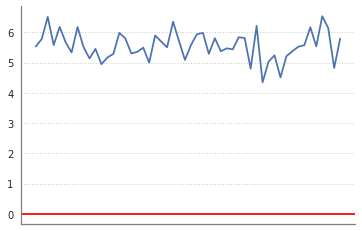

In [28]:
plot_z_score_series('type1_bin4_pseudoword2')

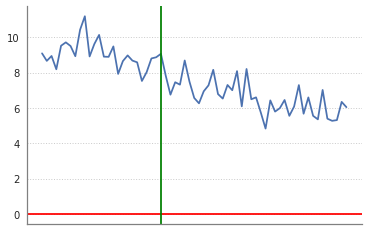

In [29]:
plot_z_score_series('type2_bin3_pseudoword2')

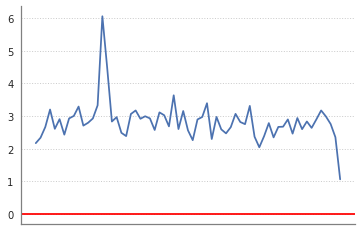

In [30]:
plot_z_score_series('type3_bin3_pseudoword2')

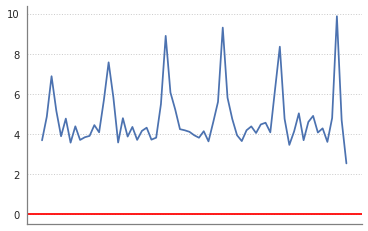

In [31]:
plot_z_score_series('type4_bin3_pseudoword2')

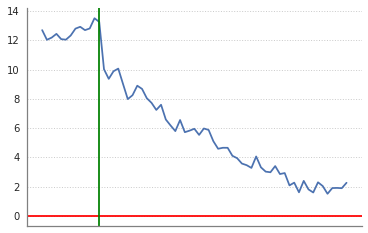

In [32]:
plot_z_score_series('type5_bin2_pseudoword2')

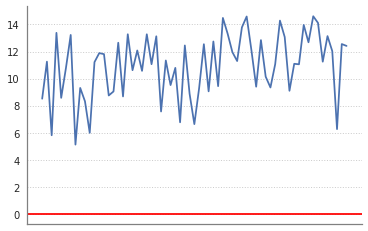

In [33]:
plot_z_score_series('type6_bin3_pseudoword5')

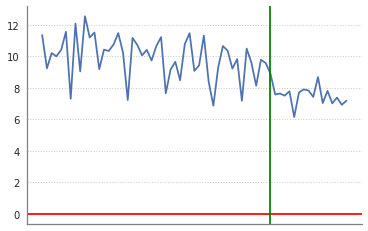

In [34]:
plot_z_score_series('type7_bin3_pseudoword5')

In [ ]:
for i in range(30):
    plot_z_score_series(l[i][0])

### ^^ Plotting z-score time-series and detected changepoints.

The actual locations of the changepoints sometimes seem a bit dodgy, but, as we'll see below, kulkarni's method does a reasonably good job of separating the 'good' pseudowords from the 'bad'

Also, at some point, I should look into the non-pseudowords that get ranked highly. Are these 'context' words whose representations change because of the influence of the pseudowords? If so, is it really fair to mark them as incorrect!?  

.

In [11]:
results1 = []
with open(directory1+'time_series_analysis_output_f2012_01_l2017_06_alast_clast_mcosine_k25_s1000_p0.05_g0_v75_metrics.tsv', 'r') as infile:
    for line in infile:
        results1.append([float(x) for x in line.strip().split('\t')])
        
results2 = []
with open(directory2+'time_series_analysis_output_f2012_01_l2017_06_alast_clast_mcosine_k25_s1000_p0.05_g0_v75_metrics.tsv', 'r') as infile:
    for line in infile:
        results2.append([float(x) for x in line.strip().split('\t')])     
        
        
results3 = []
with open(directory3+'time_series_analysis_output_f2012_01_l2017_06_alast_clast_mcosine_k25_s1000_p0.05_g0_v75_metrics.tsv', 'r') as infile:
    for line in infile:
        results3.append([float(x) for x in line.strip().split('\t')])
        
results4 = []
with open(directory4+'time_series_analysis_output_f2012_01_l2017_06_alast_clast_mcosine_k25_s1000_p0.05_g0_v75_metrics.tsv', 'r') as infile:
    for line in infile:
        results4.append([float(x) for x in line.strip().split('\t')])   

In [12]:
results5 = []
with open(directory5+'cosine_metrics.tsv', 'r') as infile:
    for line in infile:
        results5.append([float(x) for x in line.strip().split('\t')])
        
results6 = []
with open(directory6+'cosine_metrics.tsv', 'r') as infile:
    for line in infile:
        results6.append([float(x) for x in line.strip().split('\t')])     
        
        
results7 = []
with open(directory7+'cosine_metrics.tsv', 'r') as infile:
    for line in infile:
        results7.append([float(x) for x in line.strip().split('\t')])
        
results8 = []
with open(directory8+'cosine_metrics.tsv', 'r') as infile:
    for line in infile:
        results8.append([float(x) for x in line.strip().split('\t')])   

In [10]:
def plot_metric(results_list, labels, metric, fn, max_k=1000):
        if metric == 'precision':
            index = 1
        elif metric == 'recall':
            index = 2
        elif metric == 'average_precision':
            index = 3
            
        
        fig, axis = plt.subplots()
        for (i, results) in enumerate(results_list):
            x_vals = []
            y_vals = []
            for record in results:
                k = record[0]
                if k > max_k:
                    break
                m = record[index]
                x_vals.append(k)
                y_vals.append(m)
            axis.plot(x_vals, y_vals, label=labels[i])
        axis.set_xlabel("K")
        axis.set_ylabel(metric)
        axis.set_ylim(0,1)
        axis.grid(b=True, which='major', linestyle='-')
        #axis.grid(b=True, which='minor', linestyle='--')
        plt.legend()
        plt.minorticks_on()
        #plt.show()
        plt.savefig(fn+metric+'.png')

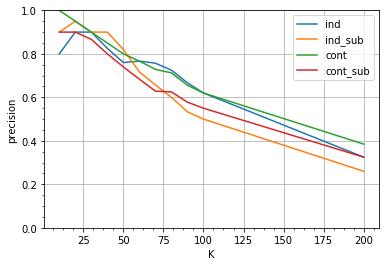

In [29]:
plot_metric([results1,results2,results3,results4], ['ind', 'ind_sub', 'cont', 'cont_sub'], 'precision','kulkarni_cosine_', max_k=200)

### ^^ Kulkarni: Precision@k


.

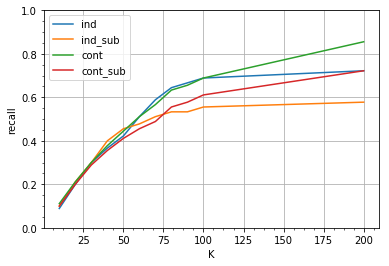

In [28]:
plot_metric([results1,results2,results3,results4], ['ind', 'ind_sub', 'cont', 'cont_sub'], 'recall', 'kulkarni_cosine_', max_k=200)

### ^^ Kulkarni: Recall@k


.

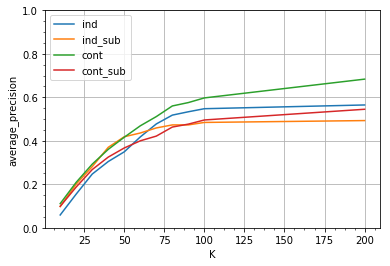

In [27]:
plot_metric([results1,results2,results3,results4], ['ind', 'ind_sub', 'cont', 'cont_sub'], 'average_precision', 'kulkarni_cosine_', max_k=200)

### ^^ Kulkarni: AP@k


.

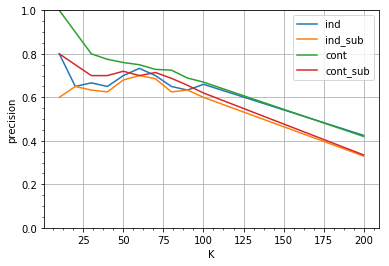

In [34]:
plot_metric([results5,results6,results7,results8], ['ind', 'ind_sub', 'cont', 'cont_sub'], 'precision', 'hamilton_cosine_', max_k=200)


### ^^ Hamilton: Precision@k


.

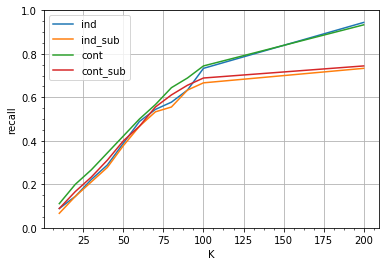

In [35]:
plot_metric([results5,results6,results7,results8], ['ind', 'ind_sub', 'cont', 'cont_sub'], 'recall', 'hamilton_cosine_', max_k=200)

### ^^ Hamilton: Recall@k


.

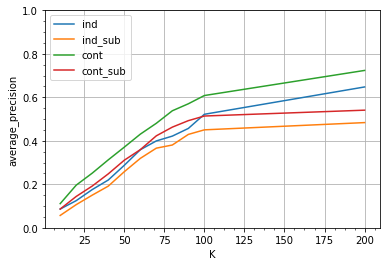

In [36]:
plot_metric([results5,results6,results7,results8], ['ind', 'ind_sub', 'cont', 'cont_sub'], 'average_precision', 'hamilton_cosine_', max_k=200)

### ^^ Hamilton: AP@k


.

In [16]:
def plot_type_breakdown(results_list_dict, labels, fn, max_k=1000):
        fig, axes = plt.subplots(2,4, sharex=True, sharey=True, figsize=(10, 5))
        
        subplot_dict = {2: (0,1), 5: (0,2), 7: (0,3), 1: (1,0), 3: (1,1), 4: (1,2), 6: (1,3)}
        
        for type_number in range(1,8):
            (i,j) = subplot_dict[type_number]
            
            for (e, results) in enumerate(results_list_dict[type_number]):
                x_vals = []
                y_vals = []
                for record in results:
                    k = record[0]
                    if k > max_k:
                        break
                    recall = record[1]
                    x_vals.append(k)
                    y_vals.append(recall)
                
                axes[i][j].grid(b=True, which='major')
                axes[i][j].plot(x_vals, y_vals, label=labels[e], linewidth=3.0)
            axes[i][j].set_title(str(type_number))
            
        axes[0][1].yaxis.set_tick_params(labelleft=True)
            
        axes[0][0].set_visible(False)
        plt.legend(loc='upper left', bbox_to_anchor= (-3.5, 2))
        plt.minorticks_on()
        #plt.show()
        plt.savefig(fn+'type_breakdown.pdf')

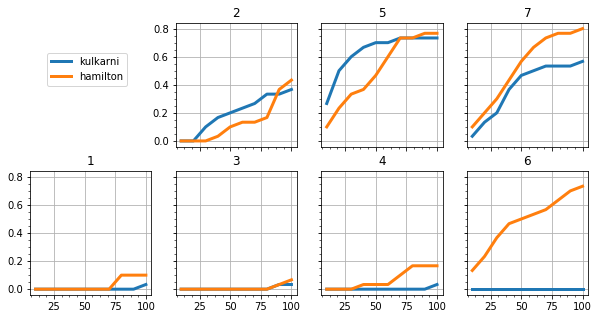

In [17]:
results_list_dict = {}
for type_number in range(1,8):
    results_list = []
    results = []
    with open(directory2+'time_series_analysis_output_f2012_01_l2017_06_alast_clast_mcosine_k25_s1000_p0.05_g0_v75_recall_type{}.tsv'.format(type_number), 'r') as infile:
        for line in infile:
            results.append([float(x) for x in line.strip().split('\t')])
    results_list.append(results)
    
    results = []
    with open(directory6+'cosine_recall_type{}.tsv'.format(type_number), 'r') as infile:
        for line in infile:
            results.append([float(x) for x in line.strip().split('\t')])          
    results_list.append(results)
        
    results_list_dict[type_number] = results_list

plot_type_breakdown(results_list_dict, ['kulkarni', 'hamilton' ], 'kulkarni_hamilton_cosine_', max_k=100)

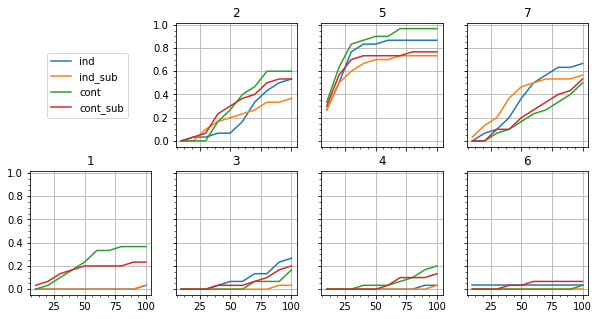

In [18]:
results_list_dict = {}
for type_number in range(1,8):
    results_list = []
    for directory in [directory1,directory2,directory3,directory4]:
        results = []
        with open(directory+'time_series_analysis_output_f2012_01_l2017_06_alast_clast_mcosine_k25_s1000_p0.05_g0_v75_recall_type{}.tsv'.format(type_number), 'r') as infile:
            for line in infile:
                results.append([float(x) for x in line.strip().split('\t')])
        results_list.append(results)
        
    results_list_dict[type_number] = results_list

plot_type_breakdown(results_list_dict, ['ind', 'ind_sub', 'cont', 'cont_sub'], 'kulkarni_cosine_', max_k=100)

### ^^ Kulkarni: Recall@k broken down by Type

Type 2 = 'snowflake'-like words (new sense gained)  
Type 5 = 'skull emoji'-like words (new sense gained AND old sense lost)  
Type 7 = 'glo'-like words (unstable word gains a stable sense)  

Type 1 = 'trump'-like (?) words (increase in frequency but meaning not changed)  
Type 3 = 'urk'-like words (temprary spike in one usually infrequent sense)  
Type 4 = 'turkey'-like words (seasonal changes)  
Type 6 = 'lm'-like words (unstable word)  

**Better recall for types 2,5,7 than for 1,3,4,6. Hooray! **


.

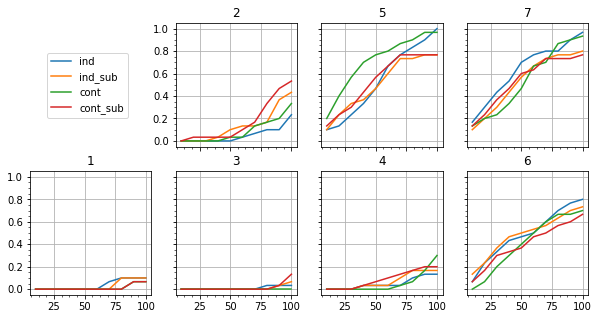

In [19]:
results_list_dict = {}
for type_number in range(1,8):
    results_list = []
    for directory in [directory5,directory6,directory7,directory8]:
        results = []
        with open(directory+'cosine_recall_type{}.tsv'.format(type_number), 'r') as infile:
            for line in infile:
                results.append([float(x) for x in line.strip().split('\t')])
        results_list.append(results)
        
    results_list_dict[type_number] = results_list

plot_type_breakdown(results_list_dict, ['ind', 'ind_sub', 'cont', 'cont_sub'], 'hamilton_cosine_', max_k=100)

### ^^ Hamilton: Recall@k broken down by Type

Type 2 = 'snowflake'-like words (new sense gained)  
Type 5 = 'skull emoji'-like words (new sense gained AND old sense lost)  
Type 7 = 'glo'-like words (unstable word gains a stable sense)  

Type 1 = 'trump'-like (?) words (increase in frequency but meaning not changed)  
Type 3 = 'urk emoji'-like words (temprary spike in one usually infrequent sense)  
Type 4 = 'turkey'-like words (seasonal changes)  
Type 6 = 'lm'-like words (unstable word)  

**Hamilton method has better recall than Kulkarni for Type 7, *but* it also has high recall for type 6, which is BAD. **

**Plus Kulkarni has better recall than Hamilton for Types 2 and 5, which are more like how meaning change is typically conceived**


.

In [31]:
def plot_freqbin_breakdown(results_list_dict, labels, fn, max_k=1000):
        fig, axes = plt.subplots(1,5, sharex=True, sharey=True, figsize=(10, 2.5))
            
        for freq_bin_number in range(5):
            i = freq_bin_number
    
            for (e, results) in enumerate(results_list_dict[freq_bin_number]):
                x_vals = []
                y_vals = []
                for record in results:
                    k = record[0]
                    if k > max_k:
                        break
                    recall = record[1]
                    x_vals.append(k)
                    y_vals.append(recall)
                
                axes[i].grid(b=True, which='major')
                axes[i].plot(x_vals, y_vals, label=labels[e])
            axes[i].set_title(str(freq_bin_number))
            
        plt.legend(loc='upper left', bbox_to_anchor= (-3.5, -0.15), ncol=4 )
        plt.minorticks_on()
        #plt.show()
        plt.savefig(fn+'freqbin_breakdown.pdf')

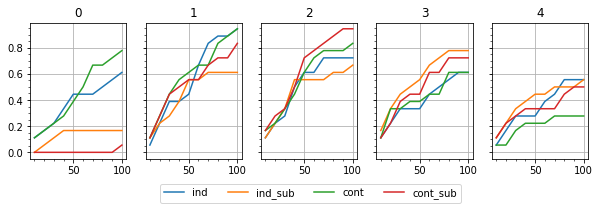

In [21]:
results_list_dict = {}
for freqbin_number in range(5):
    results_list = []
    for directory in [directory1,directory2,directory3,directory4]:
        results = []
        with open(directory+'time_series_analysis_output_f2012_01_l2017_06_alast_clast_mcosine_k25_s1000_p0.05_g0_v75_recall_freqbin{}.tsv'.format(freqbin_number), 'r') as infile:
            for line in infile:
                results.append([float(x) for x in line.strip().split('\t')])
        results_list.append(results)
        
    results_list_dict[freqbin_number] = results_list

plot_freqbin_breakdown(results_list_dict, ['ind', 'ind_sub', 'cont', 'cont_sub'], 'kulkarni_cosine_', max_k=100)

### ^^ Kulkarni: Recall@k broken down by Frequency Bin.

**Lower recall for higher frequency words. Interesting. Continuous training has the advantage for low freq words.**


.

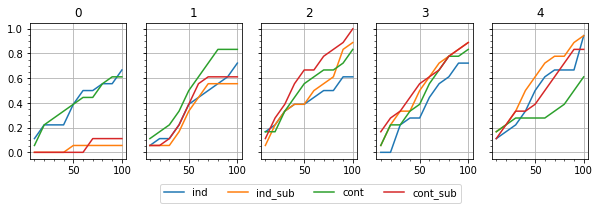

In [22]:
results_list_dict = {}
for freqbin_number in range(5):
    results_list = []
    for directory in [directory5,directory6,directory7,directory8]:
        results = []
        with open(directory+'cosine_recall_freqbin{}.tsv'.format(freqbin_number), 'r') as infile:
            for line in infile:
                results.append([float(x) for x in line.strip().split('\t')])
        results_list.append(results)
        
    results_list_dict[freqbin_number] = results_list

plot_freqbin_breakdown(results_list_dict, ['ind', 'ind_sub', 'cont', 'cont_sub'], 'hamilton_cosine_', max_k=100)

### ^^ Hamilton: Recall@k broken down by Frequency Bin.


.


In [23]:
def plot_pseudoword_breakdown(results_list_dict, labels, fn, max_k=1000):
        fig, axes = plt.subplots(1,6, sharex=True, sharey=True, figsize=(12, 2.5))
            
        for pseudoword_number in range(6):
            i = pseudoword_number
    
            for (e, results) in enumerate(results_list_dict[pseudoword_number]):
                x_vals = []
                y_vals = []
                for record in results:
                    k = record[0]
                    if k > max_k:
                        break
                    recall = record[1]
                    x_vals.append(k)
                    y_vals.append(recall)
                
                axes[i].grid(b=True, which='major')
                axes[i].plot(x_vals, y_vals, label=labels[e])
            axes[i].set_title(str(pseudoword_number))
            
        plt.legend(loc='upper left', bbox_to_anchor= (-4, -0.15), ncol=4 )
        plt.minorticks_on()
        #plt.show()
        plt.savefig(fn+'pseudoword_breakdown.png')

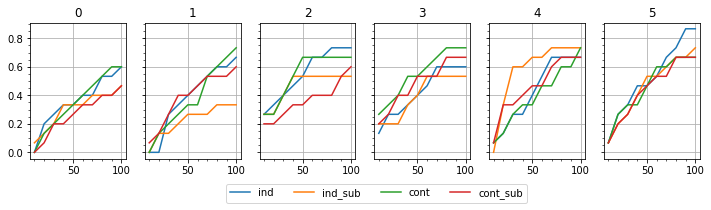

In [24]:
results_list_dict = {}
for pseudoword_number in range(6):
    results_list = []
    for directory in [directory1,directory2,directory3,directory4]:
        results = []
        with open(directory+'time_series_analysis_output_f2012_01_l2017_06_alast_clast_mcosine_k25_s1000_p0.05_g0_v75_recall_pseudoword{}.tsv'.format(pseudoword_number), 'r') as infile:
            for line in infile:
                results.append([float(x) for x in line.strip().split('\t')])
        results_list.append(results)
        
    results_list_dict[pseudoword_number] = results_list

plot_pseudoword_breakdown(results_list_dict, ['ind', 'ind_sub', 'cont', 'cont_sub'], 'kulkarni_cosine_', max_k=100)

### ^^ Kulkarni: Recall@k broken down by Pseudoword Number.

0 = prob of new sense increases linearly over whole time series.  
1 = prob of new sense increases logarithmicly over whole time series.  

2 = prob of new sense increases linearly, starting later in time series.  
3 = prob of new sense increases logarithmicly, starting later in time series.  

4 = prob of new sense increases linearly, ending earlier in  time series.  
5 = prob of new sense increases logarithmicly, ending earlier in time series.  


.

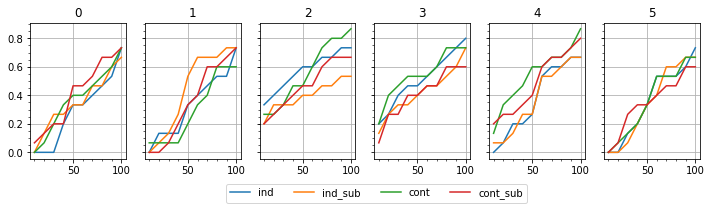

In [25]:
results_list_dict = {}
for pseudoword_number in range(6):
    results_list = []
    for directory in [directory5,directory6,directory7,directory8]:
        results = []
        with open(directory+'cosine_recall_pseudoword{}.tsv'.format(pseudoword_number), 'r') as infile:
            for line in infile:
                results.append([float(x) for x in line.strip().split('\t')])
        results_list.append(results)
        
    results_list_dict[pseudoword_number] = results_list

plot_pseudoword_breakdown(results_list_dict, ['ind', 'ind_sub', 'cont', 'cont_sub'], 'hamilton_cosine_', max_k=100)

### ^^ Hamilton: Recall@k broken down by Pseudoword Number.

0 = prob of new sense increases linearly over whole time series.  
1 = prob of new sense increases logarithmicly over whole time series.  

2 = prob of new sense increases linearly, starting later in time series.  
3 = prob of new sense increases logarithmicly, starting later in time series.  

4 = prob of new sense increases linearly, ending earlier in  time series.  
5 = prob of new sense increases logarithmicly, ending earlier in time series.  


.